<a href="https://colab.research.google.com/github/SSHI22/Github-Colab--/blob/main/Dict/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5_%EA%B8%B0%EB%A7%90%EA%B3%BC%EC%A0%9C_%EA%B8%B0%EC%98%A8_%EC%98%88%EC%B8%A1_226888_%EC%82%AC%EC%8B%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tensor Flow 2.0 딥 러닝의 작은 사례이다.
사례 내용: 현재 348개의 온도 샘플 데이터가 있으며 각 샘플에는 8개의 특성 값과 1개의 표준 값이 있으며 회귀 예측을 수행하고 신경망 모델을 구축한다. 

**1.데이터 획득** 필요한 라이브러리 파일 가져오기, 기온 데이터 가져오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# keras 모델링 방법 사용.
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 데이터 도입
filepath = '/content/drive/MyDrive/Colab Notebooks/temps.csv'
features = pd.read_csv(filepath)

**2.데이터 시각화**

In [ ]:
import datetime # 시간 데이터를 처리하여 연월일을 조합하다.

years = features['year'] # 연월일 데이터 가져오기
months = features['month']
days = features['day']

In [ ]:
# 将年月日拼接在一起--字符串类型
dates = []  # 조합 후 날짜 저장에 사용.
for year,month,day in zip(years,months,days):
    date = str(year)+'-'+str(month)+'-'+str(day)  # 연월일 사이를 '-'로 연결하다. 
    dates.append(date)

In [ ]:
# 转变成datetime格式
times = []
for date in dates:
    time = datetime.datetime.strptime(date,'%Y-%m-%d')
    times.append(time)
times[:5] # 看一下前5行

[datetime.datetime(2016, 1, 1, 0, 0),
 datetime.datetime(2016, 1, 2, 0, 0),
 datetime.datetime(2016, 1, 3, 0, 0),
 datetime.datetime(2016, 1, 4, 0, 0),
 datetime.datetime(2016, 1, 5, 0, 0)]


x축의 데이터를 다 처리했으니,지금 몇 가지 특징에 대해 곡선을 그린다.

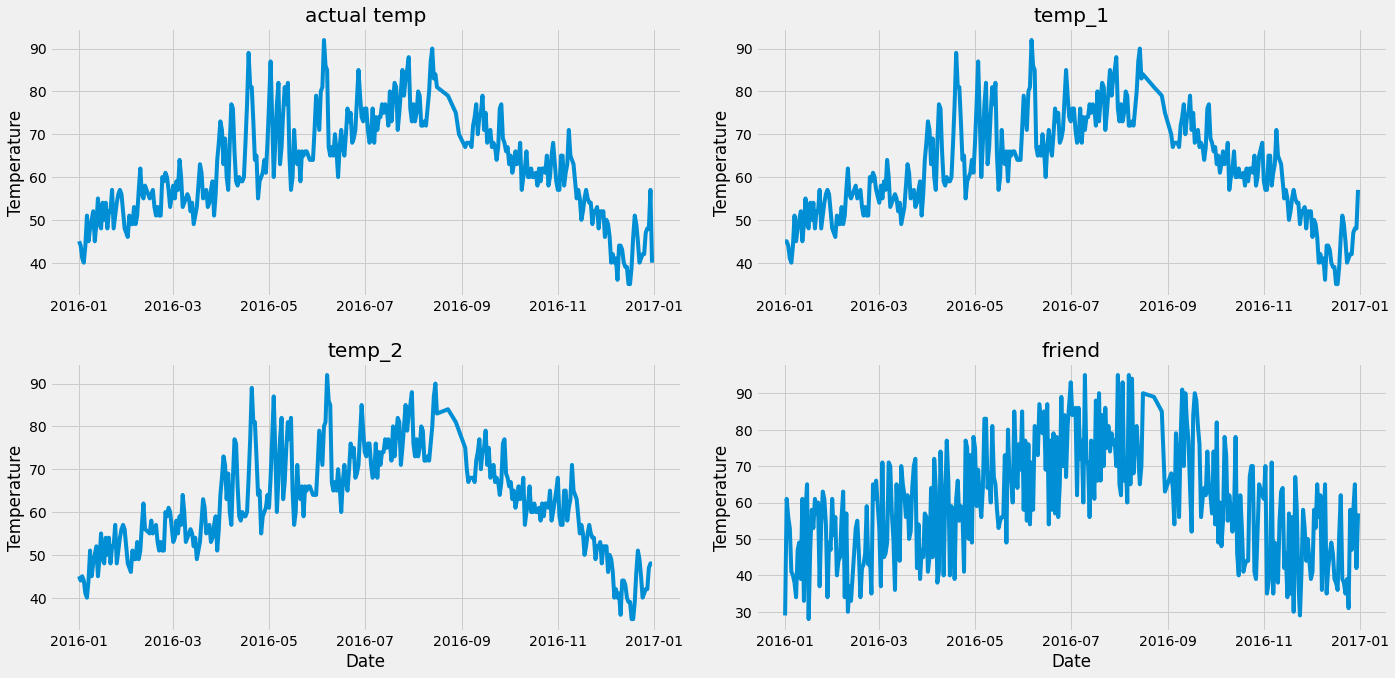

In [ ]:
# 可视化，对各个特征绘图
# 指定绘图风格
plt.style.use('fivethirtyeight')
# 设置画布，2行2列的画图窗口，第一行画ax1和ax2，第二行画ax3和ax4
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(20,10))
 
# ==1== actual特征列
ax1.plot(times,features['actual'])
# 设置x轴y轴标签和title标题
ax1.set_xlabel('');ax1.set_ylabel('Temperature');ax1.set_title('actual temp')
# ==2== 前一天的温度
ax2.plot(times,features['temp_1'])
# 设置x轴y轴标签和title标题
ax2.set_xlabel('');ax2.set_ylabel('Temperature');ax2.set_title('temp_1')
# ==3== 前2天的温度
ax3.plot(times,features['temp_2'])
# 设置x轴y轴标签和title标题
ax3.set_xlabel('Date');ax3.set_ylabel('Temperature');ax3.set_title('temp_2')
# ==4== friend
ax4.plot(times,features['friend'])
# 设置x轴y轴标签和title标题
ax4.set_xlabel('Date');ax4.set_ylabel('Temperature');ax4.set_title('friend')
# 轻量化布局调整绘图
plt.tight_layout(pad=2)

**3.특징처리** 우선 특성값과 목표값을 구분해야 한다.원본 데이터에서 고유값과 목표값을 추출해 'actual'은 당일 최고온도로 보관한다.

In [ ]:
# 对字符型数据one-hot编码
# week列是字符串，重新编码，变成数值型
features = pd.get_dummies(features)

In [ ]:
# 获取目标值y，从Series类型变成数组类型
targets = np.array(features['actual'])
# 获取特征值x，即在原数据中去掉目标值列，默认删除行，需要指定轴axis=1指向列
features = features.drop('actual',axis=1)
# 把features从DateFrame变成数组类型
features = np.array(features)

In [ ]:
# 导入标准化方法库
from sklearn import preprocessing
input_features = preprocessing.StandardScaler().fit_transform(features)

# 4.构建网络模型

（1）网络搭建

In [ ]:
# 构建层次
model = tf.keras.Sequential()
# 隐含层1设置16层，权重初始化方法设置为随机高斯分布，加入正则化惩罚项
model.add(layers.Dense(16,kernel_initializer='random_normal',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
# 隐含层2设置32层
model.add(layers.Dense(32,kernel_initializer='random_normal',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
# 输出层设置为1，即输出一个预测结果
model.add(layers.Dense(1,kernel_initializer='random_normal',kernel_regularizer=tf.keras.regularizers.l2(0.01)))

（2）优化器和损失函数

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001),loss='mean_squared_error')

（3）网络训练

In [ ]:
model.fit(input_features,targets,validation_split=0.25,epochs=100,batch_size=128)

Epoch 1/100
3/3 [==============================] - 0s 31ms/step - loss: 29.5756 - val_loss: 28.6673
Epoch 2/100
3/3 [==============================] - 0s 20ms/step - loss: 35.5989 - val_loss: 18.1645
Epoch 3/100
3/3 [==============================] - 0s 16ms/step - loss: 23.2579 - val_loss: 25.3336
Epoch 4/100
3/3 [==============================] - 0s 14ms/step - loss: 26.2316 - val_loss: 25.5176
Epoch 5/100
3/3 [==============================] - 0s 15ms/step - loss: 65.4454 - val_loss: 37.3199
Epoch 6/100
3/3 [==============================] - 0s 13ms/step - loss: 43.1317 - val_loss: 21.2837
Epoch 7/100
3/3 [==============================] - 0s 16ms/step - loss: 25.0967 - val_loss: 31.1897
Epoch 8/100
3/3 [==============================] - 0s 14ms/step - loss: 66.3226 - val_loss: 19.9194
Epoch 9/100
3/3 [==============================] - 0s 14ms/step - loss: 26.6834 - val_loss: 36.5146
Epoch 10/100
3/3 [==============================] - 0s 14ms/step - loss: 58.5888 - val_loss: 18.1108

（4）网络模型结构

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                240       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 817
Trainable params: 817
Non-trainable params: 0
_________________________________________________________________


  (5) 预测模型结果

In [ ]:
predict = model.predict(input_features)

11/11 [==============================] - 0s 2ms/step


**5. 结果展示**

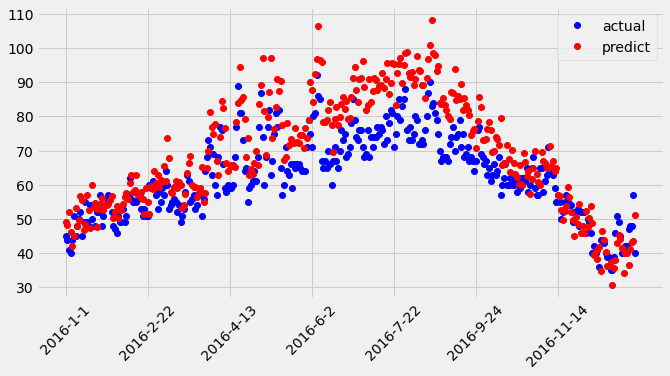

In [ ]:
# 真实值，蓝色实现
fig = plt.figure(figsize=(10,5))
axes = fig.add_subplot(111)
axes.plot(dates,targets,'bo',label='actual')
# 预测值，红色散点
axes.plot(dates,predict,'ro',label='predict')
axes.set_xticks(dates[::50])
axes.set_xticklabels(dates[::50],rotation=45)
 
plt.legend()
plt.show()